In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report,log_loss
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\91998\\Desktop\\iris.csv")

In [4]:
df.shape

(150, 6)

In [5]:
df.size

900

In [6]:
df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [7]:
df.head(1)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa


In [8]:
#EDA AND FEATURE ENGINEERING
#MODEL SELECTION , MODEL BUILDING , MODEL TUNING 
#DEPLOYMENT

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.drop(columns='Unnamed: 0',axis='columns',inplace=True)

In [12]:
df.loc[1]

Sepal.Length       4.9
Sepal.Width        3.0
Petal.Length       1.4
Petal.Width        0.2
Species         setosa
Name: 1, dtype: object

In [13]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

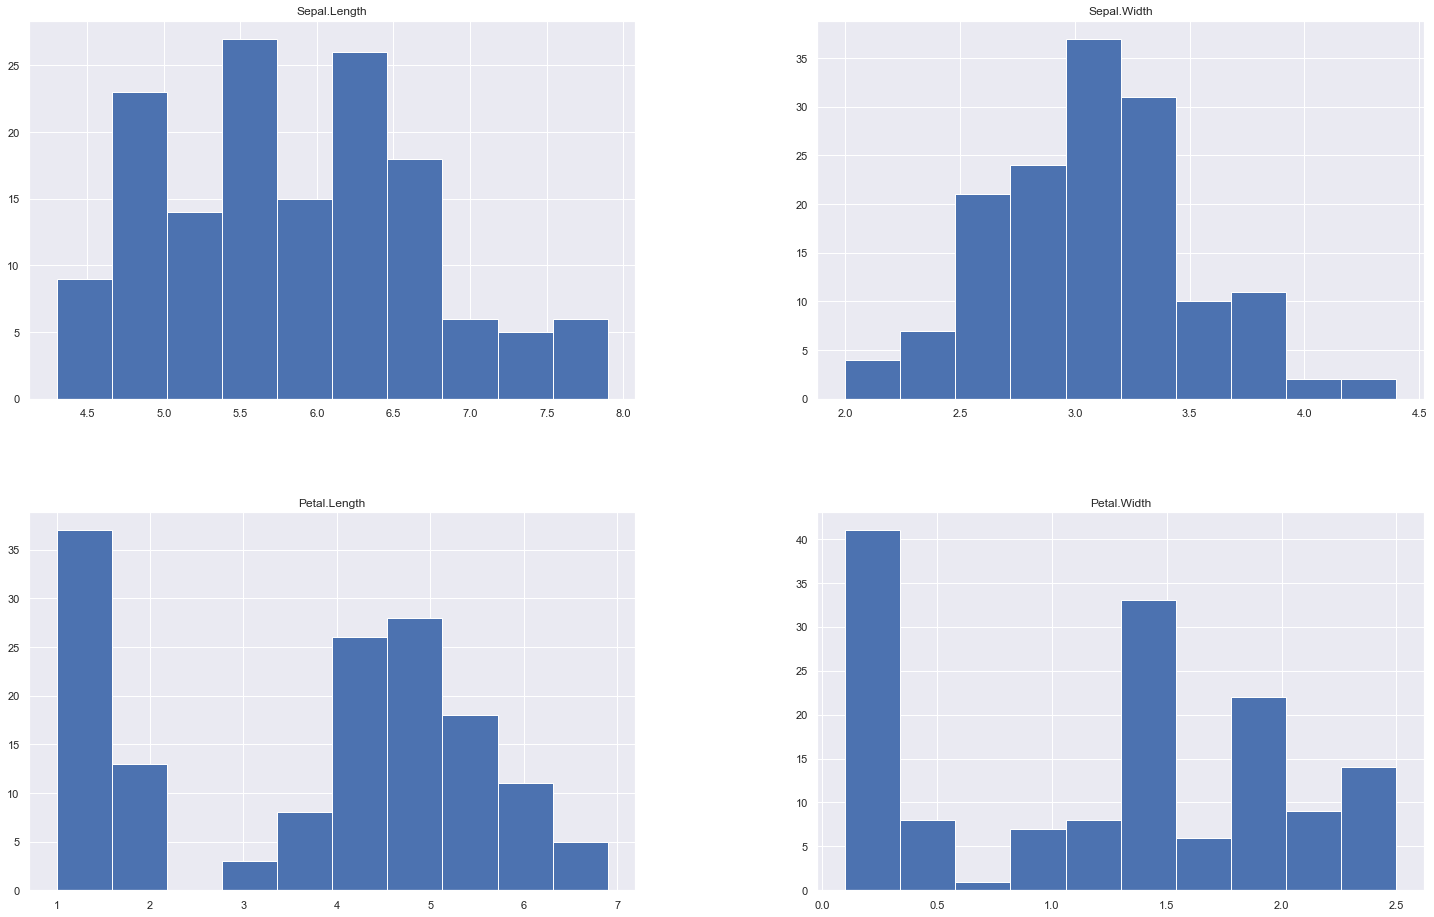

In [16]:
plt.figure
df.hist(figsize=(25,16))
plt.show()

In [17]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

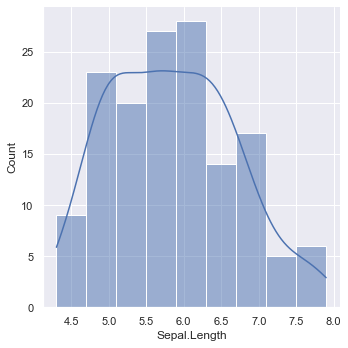

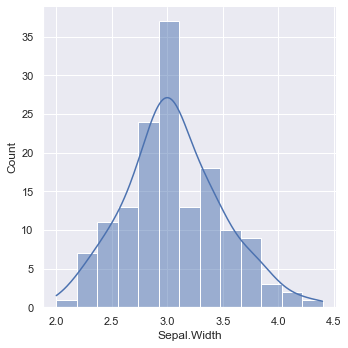

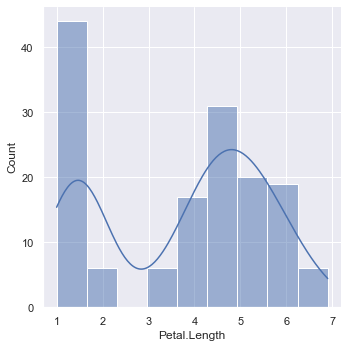

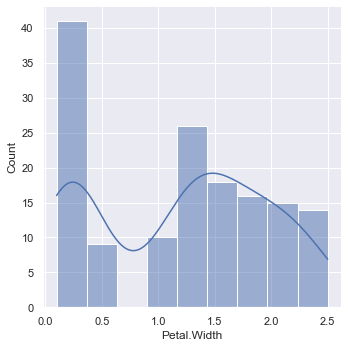

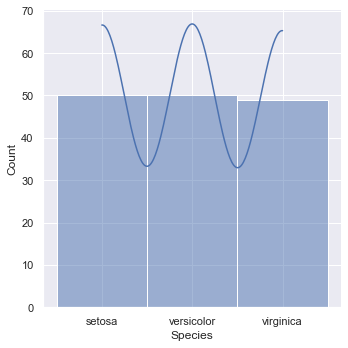

In [18]:
for col in df.columns:
    sns.displot(df[col],kde=True)
    

<AxesSubplot:xlabel='Species', ylabel='count'>

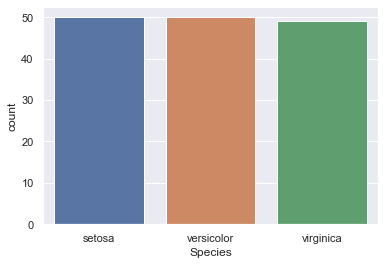

In [19]:
sns.countplot(x='Species',data=df)

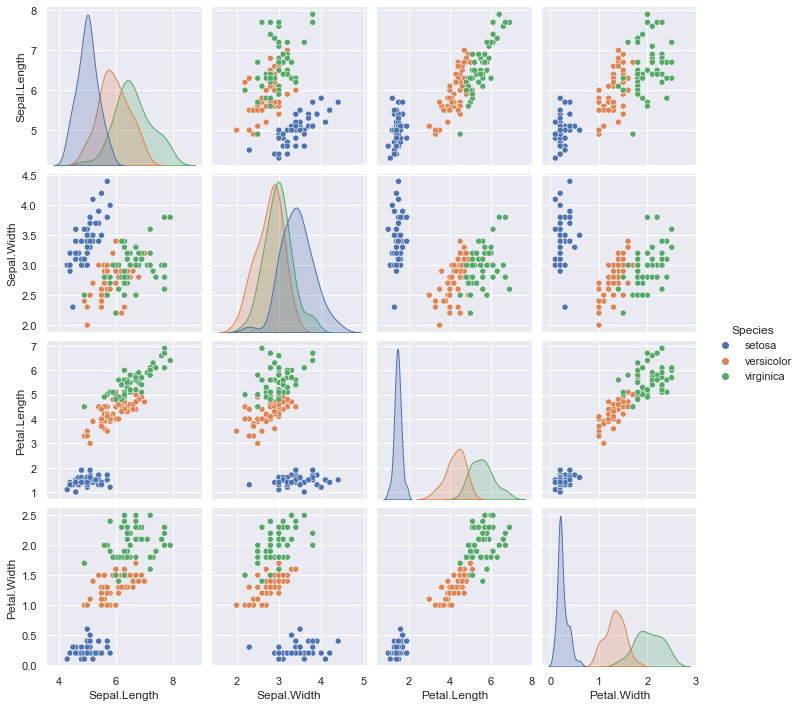

In [20]:
sns.pairplot(hue='Species',data=df)

<AxesSubplot:xlabel='Species', ylabel='Petal.Length'>

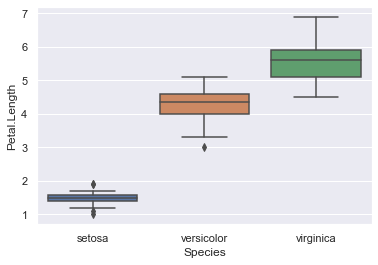

In [21]:
sns.boxplot(x='Species',y='Petal.Length',data=df)

<AxesSubplot:xlabel='Species', ylabel='Petal.Width'>

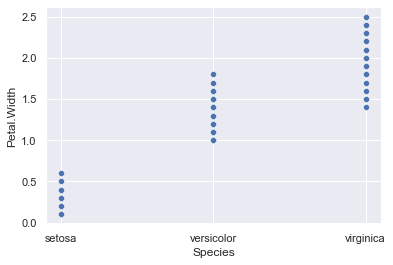

In [22]:
sns.scatterplot(x='Species',y='Petal.Width',data=df)

<AxesSubplot:>

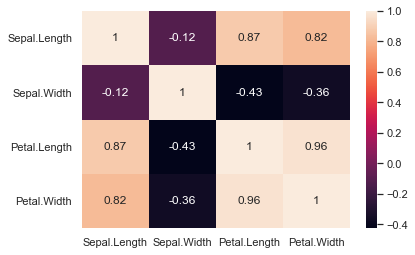

In [23]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

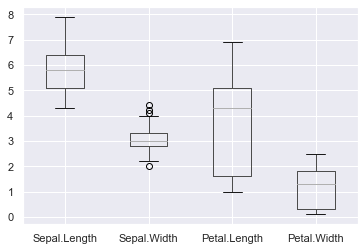

In [85]:
df.boxplot()

In [117]:
features = [ 'Sepal.Width']
features

['Sepal.Width']

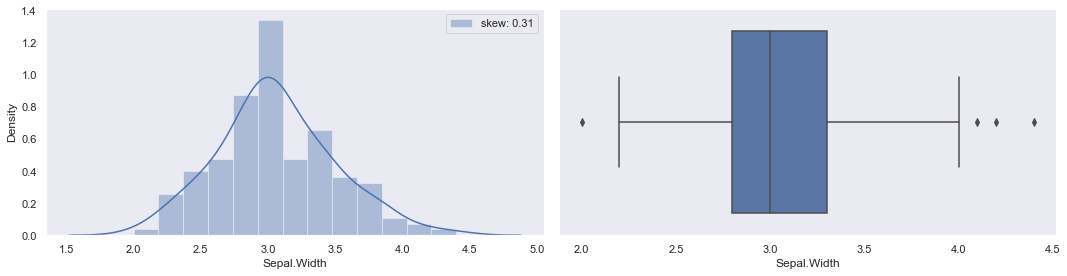

In [118]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [119]:
df.skew()

Sepal.Length    0.312826
Sepal.Width     0.307149
Petal.Length   -0.263101
Petal.Width    -0.090076
dtype: float64

In [120]:
df_cap=df.copy()

In [121]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [122]:
iqr_capping(df_cap, features, 1.5)

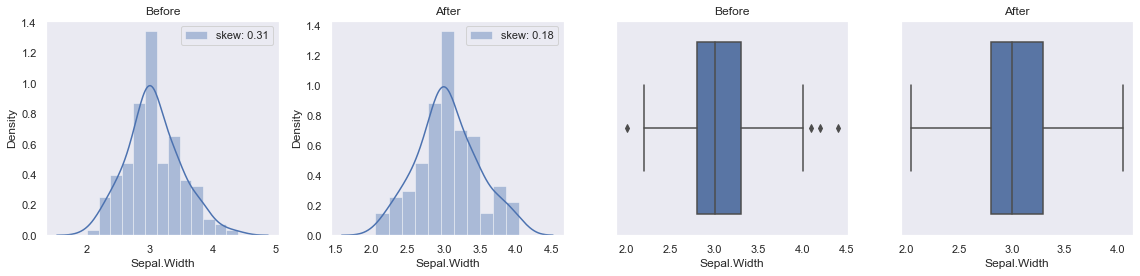

In [123]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [124]:
df_cap.value_counts('Species')

Species
setosa        50
versicolor    50
virginica     49
dtype: int64

In [125]:
df_cap.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [126]:
df_cap.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [127]:
df_cap.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0


In [128]:
df_cap

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [129]:
X=df_cap.drop(columns='Species',axis='columns')

In [131]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [130]:
y=df_cap['Species']

In [132]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 149, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
lrc=LogisticRegression()

In [135]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_test_pred=lrc.predict(X_test)

In [136]:
accuracy_score(y_test,y_test_pred)

1.0

In [86]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
X=df.drop(columns=['Species'],axis='columns')

In [88]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
y=df['Species']

In [90]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 149, dtype: object

In [93]:
le=LabelEncoder()

In [94]:
y=le.fit_transform(y)

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
lrc=LogisticRegression()

In [101]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [105]:
y_train_pred=lrc.predict(X_train)

In [106]:
accuracy_score(y_train,y_train_pred)

0.9663865546218487

In [102]:
y_test_pred=lrc.predict(X_test)

In [103]:
accuracy_score(y_test,y_test_pred)

1.0

In [104]:
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf=RandomForestClassifier()

In [111]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_test_pred=lrc.predict(X_test)

In [113]:
accuracy_score(y_test,y_test_pred)

1.0